In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
# pd.set_option('max_columns', None)  # show all columns
from sklearn.preprocessing import OneHotEncoder
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [2]:
df = pd.read_excel('../BJK_corregido.xlsx', engine='openpyxl')

FileNotFoundError: [Errno 2] No such file or directory: '../BJK_corregido.xlsx'

In [ ]:
df_2 = pd.read_excel('../BJK_corregido.xlsx', engine='openpyxl')  # to make changes

### Prepare data:
Discrete vars:  
- ```[setNumber, gameNumber, pointNumber, serveNumber, shotCount, efectividad,
1º o 2º saque, seve_class, Lado(1:iguales, 0:ventaja), DIRECCIÓN, X1,...]```

Discrete vars to delete (only one value) --> no information!  
```[Point,```

Continuous vars:  
- ```v(m/s), v(km/h), timeHIT,Y1, Y1(ABS), Z1(h), timeNET, TimeN-TimeH,
timeBounce, TimeB-TimeH,PreVx, PreVy, PreVz, PreV, PostVx, PostVy,
PostVz, PostV, Dif. V1-V2, Dif(km/h)```


Vars to delete (duplicated or all the same):
- ```v(km/h), Dif. (km/h), Point,```

In [4]:
### Check how many rows have empty values or NaNs
print(df_2.isnull().sum().sum(), '/', len(df_2))  ### too many, we can't just delete rows with empty values --> interpolate

25076 / 29193


In [5]:
### interpolate NaN with none-linearities
for i in df_2.columns:
    df_2[i] = df_2[i].interpolate(method='polynomial', order=2)

In [6]:
print(df_2.isnull().sum().sum(), '/', len(df_2))

0 / 29193


In [7]:
df_2.describe()

,Sexo,setNumber,gameNumber,Point,pointNumber,serveNumber,shotCount,Efectividad,1º o 2º saque,Lado(1:Iguales;0:Ventaja),...,PreVx,PreVy,PreVz,PreV,PostVx,PostVy,PostVz,PostV,Dif. V1-V2,Dif. (km/h)
count,29193.000000,29193.000000,29193.000000,29193.0,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,...,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000,29193.000000
mean,1.259583,2.311479,6.132806,1.0,4.141746,1.000171,2.864831,0.290823,1.312609,0.519371,...,-0.035221,0.022399,-7.833186,32.964256,-0.030041,0.014209,7.301335,28.297817,-310.485986,-1117.749549
std,0.438413,1.183707,4.177688,0.0,2.833941,0.013086,2.453197,0.454150,0.463564,0.499633,...,31.428890,7.680863,0.630473,4.674563,23.382625,5.692349,7.833497,27.015457,663.169262,2387.409344
min,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,-45.184000,-15.984000,-10.674000,6.877954,-49.672000,-27.634000,-25.036000,2.655802,-2111.689611,-7602.082598
25%,1.000000,1.000000,3.000000,1.0,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,-31.097000,-6.954000,-8.275000,29.547628,-22.891000,-5.148000,6.129000,21.530544,6.868554,24.726796
50%,1.000000,2.000000,6.000000,1.0,4.000000,1.000000,2.000000,0.000000,1.000000,1.000000,...,18.837000,0.179000,-7.884000,33.115124,12.051000,0.059000,6.543000,24.827912,8.280708,29.810547
75%,2.000000,3.000000,8.000000,1.0,5.000000,1.000000,4.000000,1.000000,2.000000,1.000000,...,31.048000,6.978000,-7.399000,36.529200,22.815000,5.170000,6.915000,28.152357,9.129681,32.866850
max,2.000000,5.000000,46.000000,1.0,27.000000,2.000000,26.000000,1.000000,2.000000,1.000000,...,46.920000,16.162000,-2.862000,49.014722,47.529000,21.311000,96.834206,329.357567,135.018454,486.066435


In [45]:
df_2.to_csv('../predictions/df_2.csv')

In [46]:
df_2.Efectividad.values

array([1, 0, 1, ..., 0, 0, 0])

In [4]:
# sorted(df_2.columns)

startScore_Server  = [0 15 30 40 50 3 4 6 1 5 7 8 2 'WIN' 9 10 11 12 13]  
startScore_Receiver = [0 15 40 50 30 1 2 5 6 3 7 4 8 'LOS' 9 10 11 12 13]

I don't understand this variable ... not in a format the machine can understand. Delete for the moment

EventID: I don't think the machine can understand this variable for the moment ...   
   not clear how to show to the machine (162 events?)... we will show all events as one for the moment

In [44]:
### delete vars
df_2.drop(['V (km/h)', 'Dif. (km/h)', 'Point', 'EventID', 'startScore_Server', 'startScore_Receiver'], axis=1, inplace=True)

In [9]:
### Ordinal vars can usually be kept sa they are, since we assume that their order is the right order
discrete_ordinal = ["setNumber", 
                 "gameNumber", 
                 "pointNumber", 
                 "serveNumber", 
                 "shotCount", 
                 "Efectividad",
                 "1º o 2º saque", 
                 "Lado(1:Iguales;0:Ventaja)", 
                 "DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T"]

### discrete one_hot encoding are vars that are strings or not ordinal, so they need to be unfolded into binary vars
discrete_one_hot = ["serve_class"]

discrete_one_hot

['serve_class']

In [10]:
def one_hot(df, cols_list):
    """
    cols_list=['service', 'gender', ...]
    """
    #perform one-hot encoding on 'team' column
    for i in cols_list:
        print(f"one hot on '{i}'")
        df_discrete = df[cols_list]
        encoder_df = pd.DataFrame(encoder.fit_transform(df_discrete[[i]]).toarray())
        ### rename columns
        print('encoder.categories_: ', encoder.categories_[0].tolist())
        l = [i+'___'+str(x) for x in encoder.categories_[0]]
        # print(l)
        encoder_df.columns = l # encoder.categories_
        # merge one-hot encoded columns back with original DataFrame
        df = pd.concat([df, encoder_df], axis=1)
    df.drop(cols_list, axis=1, inplace=True)
    return df

In [11]:
df_3 = one_hot(df_2, discrete_one_hot)

one hot on 'serve_class'
encoder.categories_:  ['ACE', 'FAULT', 'NOT RETURNED', 'RETURNED']


In [12]:
df_3

,Sexo,setNumber,gameNumber,pointNumber,serveNumber,shotCount,Efectividad,1º o 2º saque,Lado(1:Iguales;0:Ventaja),DIRECCIÓN:1 abierto;2 al cuerpo;3 a la T,...,PreV,PostVx,PostVy,PostVz,PostV,Dif. V1-V2,serve_class___ACE,serve_class___FAULT,serve_class___NOT RETURNED,serve_class___RETURNED
0,1,1,1,1,1,2,1,1,1,2,...,31.203651,21.263,5.684,6.380,22.915659,8.287992,0.0,0.0,1.0,0.0
1,1,1,1,2,1,4,0,1,0,1,...,35.767428,24.944,-5.850,6.801,26.508098,9.259331,0.0,0.0,0.0,1.0
2,1,1,1,3,1,2,1,1,1,2,...,30.302482,21.009,5.585,7.058,22.855758,7.446724,0.0,0.0,1.0,0.0
3,1,1,1,4,1,1,1,2,0,1,...,24.999723,15.163,-3.431,6.906,17.011207,7.988516,0.0,1.0,0.0,0.0
4,1,1,2,1,1,4,0,1,1,2,...,27.657937,18.158,2.731,6.956,19.635612,8.022325,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29188,1,3,9,1,1,2,0,1,1,3,...,33.999023,-23.728,-2.379,6.608,24.745571,9.253452,0.0,0.0,1.0,0.0
29189,1,3,9,3,1,1,0,2,0,2,...,29.762144,-19.062,-4.510,7.014,20.806156,8.955988,0.0,1.0,0.0,0.0
29190,1,3,9,4,1,3,0,1,0,1,...,27.476137,-17.347,6.608,6.992,19.836132,7.640005,0.0,0.0,0.0,1.0
29191,1,3,9,5,1,1,0,2,0,3,...,31.018599,-21.329,-2.954,6.647,22.535194,8.483405,0.0,1.0,0.0,0.0


In [13]:
corr = df_3.corr(method='pearson').Efectividad.sort_values(ascending=False)
correlated_cols = list(corr[corr>0].index)

In [14]:
correlated_cols

['Efectividad',
 'serve_class___NOT RETURNED',
 'serve_class___ACE',
 'PreV',
 'V (m/s)',
 'Y1(ABS)',
 'Dif. V1-V2',
 'Z1 (h)',
 'setNumber',
 'X1',
 'PostV',
 'Lado(1:Iguales;0:Ventaja)',
 'serveNumber',
 'Y1']

In [15]:
corr

Efectividad                                 1.000000
serve_class___NOT RETURNED                  0.588071
serve_class___ACE                           0.298286
PreV                                        0.196316
V (m/s)                                     0.192850
Y1(ABS)                                     0.096717
Dif. V1-V2                                  0.094357
Z1 (h)                                      0.061928
setNumber                                   0.031322
X1                                          0.014339
PostV                                       0.013231
Lado(1:Iguales;0:Ventaja)                   0.013065
serveNumber                                 0.008910
Y1                                          0.000038
PreVy                                      -0.000053
PostVy                                     -0.000458
gameNumber                                 -0.001562
PostVx                                     -0.015682
PreVx                                      -0.

#### **Conclusión:**
las correlaciones positivas son las que están correlacionadas con efectividad = 1,
pero las negativas pueden estar correlacionadas con efectividad nula, la cual es info válida tb.

Vamos a preparar dos datasets, uno con las positivas y otro con todas, Entrenar un par de modelos y sacar conclusiones.

Also, for the moment we are goind to delete the eventID --> 162 different events ... 

In [16]:
df_positive_corr = df_3[correlated_cols]
# df_positive_corr.head()

In [17]:
df_positive_corr_copy = df_positive_corr

## Filter Outliers

In [18]:
cols = ['Y1(ABS)'] # one or more
Q1 = df_positive_corr[cols].quantile(0.25)
Q3 = df_positive_corr[cols].quantile(0.99)
IQR = Q3 - Q1
df_positive_corr = df_positive_corr[~((df_positive_corr[cols] < (Q1 - 1.5 * IQR)) |(df_positive_corr[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

cols = ['Dif. V1-V2'] # one or more
Q1 = df_positive_corr[cols].quantile(0.25)
Q3 = df_positive_corr[cols].quantile(0.75)
IQR = Q3 - Q1
df_positive_corr = df_positive_corr[~((df_positive_corr[cols] < (Q1 - 1.5 * IQR)) |(df_positive_corr[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

cols = ['PostV'] # one or more
Q1 = df_positive_corr[cols].quantile(0.05)
Q3 = df_positive_corr[cols].quantile(0.75)
IQR = Q3 - Q1
df_positive_corr = df_positive_corr[~((df_positive_corr[cols] < (Q1 - 1.5 * IQR)) |(df_positive_corr[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:>

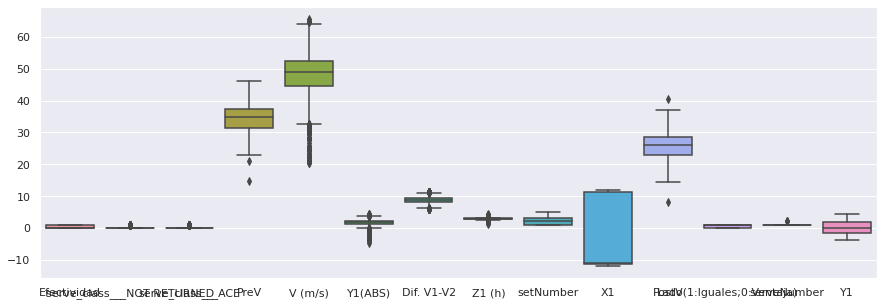

In [20]:
import numpy as np
import seaborn as sn
sn.set(rc={"figure.figsize":(15, 5)})
sn.boxplot(data=df_positive_corr)

In [22]:
### save as csv
### split before preprocessing, to avoid data leakage
XX, yy = df_positive_corr, df_positive_corr.Efectividad
XX.drop('Efectividad', axis=1, inplace=True)

# Creating a dataframe with 80%
# values of original dataframe
Xtrain = XX.sample(frac = 0.8)
Ytrain = yy.sample(frac = 0.8)
 
# Creating dataframe with
# rest of the 20% values
Xtest = XX.drop(Xtrain.index)
Ytest = yy.drop(Ytrain.index)

In [23]:
Xtrain.to_csv('../predictions/Xtrain.csv')
Ytrain.to_csv('../predictions/Ytrain.csv')
Xtest.to_csv('../predictions/Xtest.csv')
Ytest.to_csv('../predictions/Ytest.csv')

In [21]:
!pwd

/home/javier/mis_proyectos/tennis/EDA


### Algorithms:

In [219]:
# https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

### split before preprocessing, to avoid data leakage
XX, yy = df_positive_corr, df_positive_corr.Efectividad
XX.drop('Efectividad', axis=1, inplace=True)

X, y = XX.values, yy.values # .reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# X, y = df_positive_corr.values, df_positive_corr.Efectividad.values # .reshape(-1, 1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

# print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


### try with df_positive_corr_copy  # validate with the original dataset
XX, yy = df_positive_corr_copy, df_positive_corr_copy.Efectividad
XX.drop('Efectividad', axis=1, inplace=True)
X, y = XX.values, yy.values # .reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

y_pred = svclassifier.predict(X_test)

# print('\n', confusion_matrix(y_test, y_pred))
print('\n', classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      2901
           1       0.86      0.53      0.66      1296

    accuracy                           0.83      4197
   macro avg       0.84      0.75      0.77      4197
weighted avg       0.83      0.83      0.81      4197



/home/javier/python_venvs/tennis/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



               precision    recall  f1-score   support

           0       0.80      0.98      0.88      4131
           1       0.88      0.43      0.57      1708

    accuracy                           0.81      5839
   macro avg       0.84      0.70      0.73      5839
weighted avg       0.83      0.81      0.79      5839



In [247]:
### apply zscore to X
XX, yy = df_positive_corr, df_positive_corr.Efectividad
XX.drop('Efectividad', axis=1, inplace=True)

from sklearn.preprocessing import MinMaxScaler

X, y = XX.values, yy.values # .reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel='rbf')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2914
           1       0.87      0.70      0.77      1283

    accuracy                           0.87      4197
   macro avg       0.87      0.82      0.84      4197
weighted avg       0.87      0.87      0.87      4197


              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2914
           1       0.87      0.70      0.77      1283

    accuracy                           0.87      4197
   macro avg       0.87      0.82      0.84      4197
weighted avg       0.87      0.87      0.87      4197



In [254]:
### save final dataset
import pickle as pkl

#to save it
with open("train.pkl", "wb") as f:
    pkl.dump([X_train_scaled, y_train], f)
    
#to save it
with open("test.pkl", "wb") as f:
    pkl.dump([X_test_scaled, y_test], f)    

# #to load it
# with open("train.pkl", "r") as f:
#     train_x, train_y = pkl.load(f)

In [251]:
X_train_scaled

array([[0.        , 1.        , 0.71307178, ..., 0.        , 0.        ,
        0.54797702],
       [1.        , 0.        , 0.64719847, ..., 0.        , 0.        ,
        0.32037648],
       [0.        , 0.        , 0.6212989 , ..., 1.        , 0.        ,
        0.63292996],
       ...,
       [0.        , 0.        , 0.48127286, ..., 0.        , 0.        ,
        0.62681824],
       [0.        , 0.        , 0.63497713, ..., 0.        , 0.        ,
        0.20682068],
       [1.        , 0.        , 0.62260005, ..., 1.        , 0.        ,
        0.23297885]])

In [ ]:
X_train_scaled
X_test_scaled
y_test
y_train

## Try all possible algorithms and compare! 
Here starts the fun part 

## Lessons learnt - TODOES:  
- use df_3, not the top correlated df  
- using V vs Efectividad gives almos tthe same results!  
- Try all algorithms with all 3 X options!!  
    - V vs Efectividad
    - df_3 vs Efectividad
    - Max_correlated_vars_df vs Efectividad

In [36]:
import pickle

# https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

### Load Data:
X_train_scaled, y_train = pickle.load(open("train.pkl", "rb"))  # X_train_scaled, y_train
X_test_scaled, y_test = pickle.load(open("test.pkl", "rb"))     # 

### load the model
model = pickle.load(open("model.pkl", "rb"))

## use model to predict
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2914
           1       0.87      0.70      0.77      1283

    accuracy                           0.87      4197
   macro avg       0.87      0.82      0.84      4197
weighted avg       0.87      0.87      0.87      4197



In [25]:
model = SVC(kernel='rbf')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2914
           1       0.87      0.70      0.77      1283

    accuracy                           0.87      4197
   macro avg       0.87      0.82      0.84      4197
weighted avg       0.87      0.87      0.87      4197



In [26]:
### Let's play with some Hyperparameters Cross-Validation search:
# C: Regularization parameter   -   float, default=1.0   -  Lambda in formulation
# gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

classification_report(y_test, y_pred, output_dict=True)['accuracy']

0.8746723850369311

In [18]:
X_train_scaled.var()

0.11528814428713272

In [25]:
gamma = 1 / (X_train_scaled.shape[1]*X_train_scaled.var())  # gamma = 1 / (n_features * X_train_scaled.var()) 
gamma  ### default gamma

0.6672245216428754

In [26]:
### create the values for the grid
C_search     = [0.01, 0.1, 0.5, 0.75, 1,   1.50, 2.0]
gamma_search = [0.01, 0.1, 0.5, 0.75, 1,   1.25, 1.5]

In [44]:
# from tqdm import tqdm
# results_dicto = []
# 
# for c in tqdm(C_search, desc='Iter. over Regularization parameter & kernel gammas'):
#     for g in gamma_search:
#         m = SVC(kernel='rbf', C=c, gamma=g)  # model  # tol = cost function tolerance
#         m.fit(X_train_scaled, y_train)
#         y_pred = m.predict(X_test_scaled)
#         cls_acc = classification_report(y_test, y_pred, output_dict=True)['accuracy']
#         results = {'lambda': m.C, 'gamma': m.gamma, 'accuracy': cls_acc}
#         results_dicto.append(results)
# 
# print()
# results_dicto

In [45]:
max([x['accuracy'] for x in nested_dicto]), m.C, m.gamma

(0.8746723850369311, 2.0, 1.5)

In [27]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

/home/javier/python_venvs/tennis/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [28]:
"""
X_train_scaled, y_train
X_test_scaled, y_test
"""
model = XGBClassifier()
model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

/home/javier/python_venvs/tennis/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:54:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2914
           1       0.86      0.70      0.77      1283

    accuracy                           0.87      4197
   macro avg       0.87      0.82      0.84      4197
weighted avg       0.87      0.87      0.87      4197



In [30]:
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }

numFolds = 5
kfold_5 = KFold(n_splits=numFolds)

clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = kfold_5,  
                         n_iter = 5, # you want 5 here not 25 if I understand you correctly 
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

clf.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


KeyboardInterrupt: 

In [ ]:
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

### Try so autoML frameworks

In [3]:
# ### not working on jupyter
# import autosklearn.classification
# cls = autosklearn.classificationcls.fit(X_train_scaled, y_train)
# y_pred = cls.predict(X_test_scaled)
# print(classification_report(y_test, y_pred))

### not working on jupyter

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train_scaled, y_train)   # X_train_scaled, y_train
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2914
           1       0.87      0.66      0.75      1283

    accuracy                           0.87      4197
   macro avg       0.87      0.81      0.83      4197
weighted avg       0.87      0.87      0.86      4197



In [40]:
"""
X_train_scaled, y_train
X_test_scaled, y_test
"""

import lightgbm as lgb
from lightgbm import LGBMClassifier
 
# Skipping Data Exploration
# Dummification of Diagnosis Column (1-Benign, 0-Malignant Cancer)
# data['diagnosis']= pd.get_dummies(data['diagnosis'])
 
# Creating an object for model and fitting it on training data set
model = LGBMClassifier()
model.fit(X_train_scaled, y_train)
 
# Predicting the Target variable
pred = model.predict(X_test_scaled)
print(pred)
accuracy = model.score(X_test_scaled, y_test)
print(accuracy)

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

[0 0 0 ... 0 0 0]
0.8744341196092447
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2914
           1       0.87      0.70      0.77      1283

    accuracy                           0.87      4197
   macro avg       0.87      0.82      0.84      4197
weighted avg       0.87      0.87      0.87      4197

